In [105]:
import numpy as np 
import matplotlib.pyplot as plt 
from n_arm_bandit import NArmedBandit
from agent import BanditAgent
from environment import BanditEnvironment
import matplotlib.pyplot as plt

In [106]:
history = np.load("./history.npy")
rewards = np.load("./rewards.npy")
actions = np.load("./actions.npy")
mean_deviations = np.load("./mean_deviation_pairs.npy")
value_table = np.load("./value_table.npy")
greedy = np.load("./greedy.npy")

domain = np.arange(0, 2000, 1)

# Training 

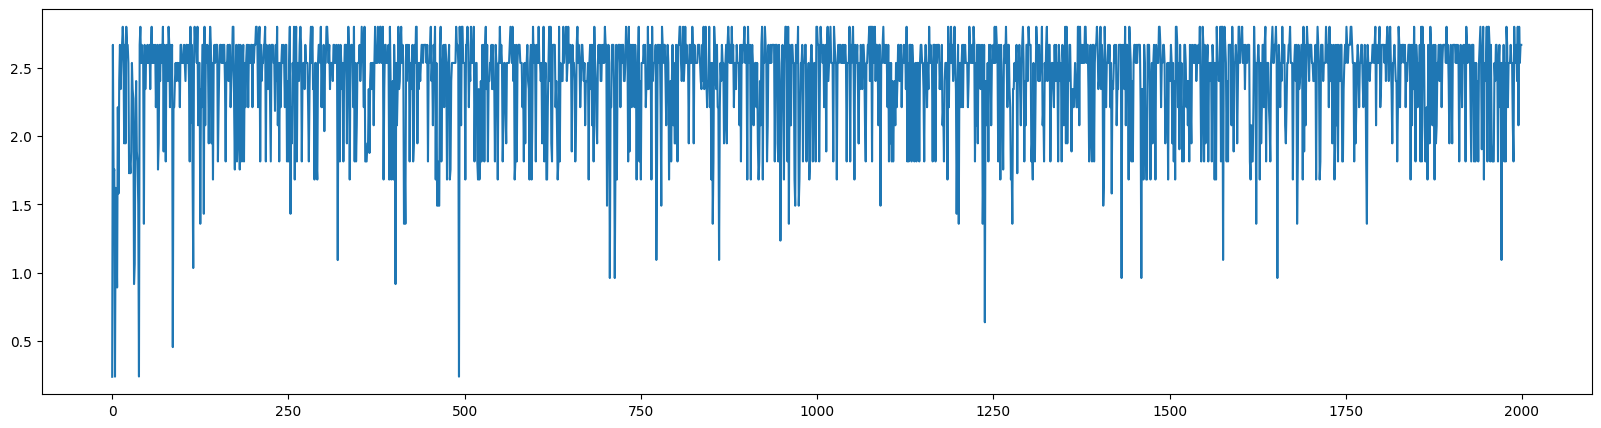

In [107]:
plt.figure(figsize=(20, 5))
plt.plot(domain, history)

In [108]:
reward_types, reward_type_counts = np.unique(history, return_counts=True)

<BarContainer object of 45 artists>

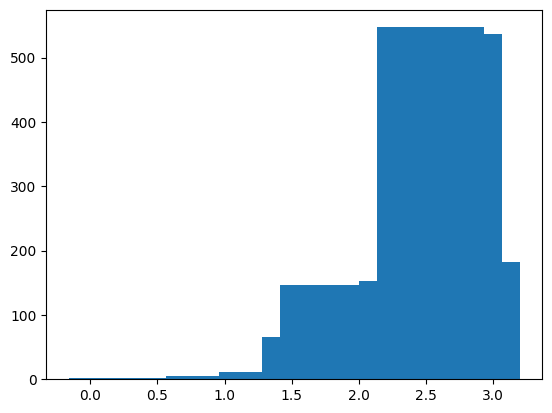

In [109]:
plt.bar(reward_types, reward_type_counts)

# Actions

In [110]:
actions

array([0, 1, 2, ..., 1, 1, 1], dtype=int64)

In [111]:
action_types, counts = np.unique(actions, return_counts=True) 

<BarContainer object of 10 artists>

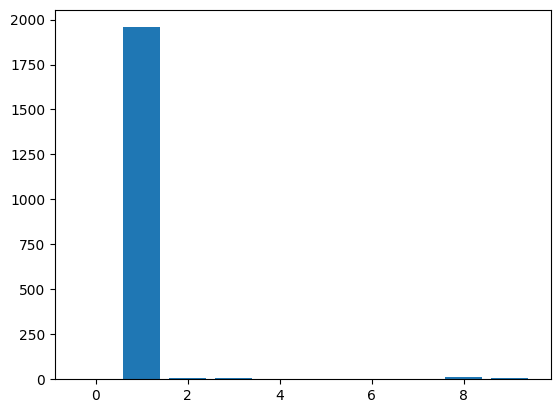

In [112]:
plt.bar(action_types, counts)

# Rewards

In [113]:
rewards

array([0.47689809, 0.62516365, 0.54009006, 0.18833828, 0.46860457,
       0.2972407 , 0.07926817, 0.0802284 , 0.80047871, 0.93273057])

# Value table

In [114]:
value_table

array([0.23972498, 2.4235249 , 1.6382661 , 1.98895   , 0.23972498,
       1.1512678 , 1.1773286 , 0.67374957, 2.1366324 , 1.7908578 ],
      dtype=float32)

In [115]:
mean_deviations

array([[7.        , 0.35133748],
       [9.        , 0.61187986],
       [1.        , 0.01458832],
       [0.        , 0.91421637],
       [7.        , 0.25679358],
       [3.        , 0.17320857],
       [5.        , 0.25907368],
       [6.        , 0.15590674],
       [9.        , 0.78240795],
       [1.        , 0.7039974 ]])

In [116]:
np.argmax(value_table) 

1

# Greedy 

In [117]:
greedy

array([], dtype=float64)

# Test reward and distribution

In [118]:
true_reward = np.zeros(10) 

for symbol, (mean, deviation) in enumerate(mean_deviations): 
    for i in range(1000): 
        random_numbers = np.random.normal(
            loc=mean, scale=deviation, size=3)
        random_indices = [np.abs(int(np.floor(num % 10)))
                          for num in random_numbers]

        for random_index in random_indices: 
            true_reward[symbol] += rewards[random_index]
        

In [119]:
true_reward = true_reward / 1000

In [120]:
true_reward

array([0.24503936, 2.43533576, 1.65768884, 2.09444664, 0.23950797,
       1.09897404, 1.14671154, 0.56040386, 2.2329818 , 1.73886374])